In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/msambare/fer2013')
# sdlpkmrmkkml
# 91b742aa9b01dc96ac5940ea43212cdc

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sdlpkmrmkkml
Your Kaggle Key: ··········


100%|██████████| 60.3M/60.3M [00:01<00:00, 34.0MB/s]


In [ ]:
import os
print(os.listdir('/content/fer2013'))

['train', 'test']


In [ ]:
train_dir ='/content/fer2013/train'
test_dir  ='/content/fer2013/test'

In [ ]:
print('Train Directory :')
print(os.listdir('/content/fer2013/train'))

Train Directory :
['neutral', 'happy', 'disgust', 'surprise', 'sad', 'angry', 'fear']


In [ ]:
print('Test Directory :')
print(os.listdir('/content/fer2013/test'))

Test Directory :
['neutral', 'happy', 'disgust', 'surprise', 'sad', 'angry', 'fear']


In [ ]:
print('Count of Images in Training Set: ')
for exp in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+'/'+exp)))+" "+exp+" "+"images")

Count of Images in Training Set: 
4965 neutral images
7215 happy images
436 disgust images
3171 surprise images
4830 sad images
3995 angry images
4097 fear images


In [ ]:
print('Count of Images in Testing Set: ')
for exp in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+'/'+exp)))+" "+exp +" "+"images")

Count of Images in Testing Set: 
1233 neutral images
1774 happy images
111 disgust images
831 surprise images
1247 sad images
958 angry images
1024 fear images


In [ ]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

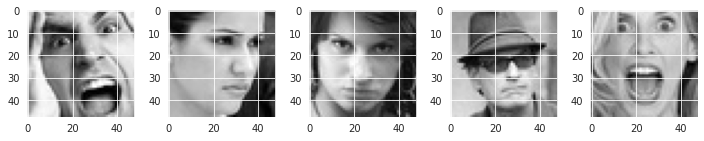

In [ ]:
plot_images(train_dir+"/"+"angry")

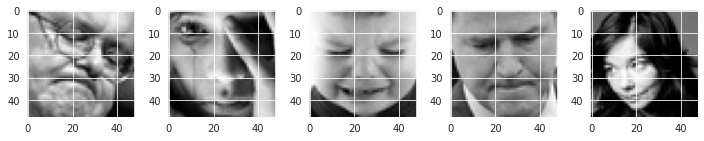

In [ ]:
plot_images(train_dir+"/"+"sad")

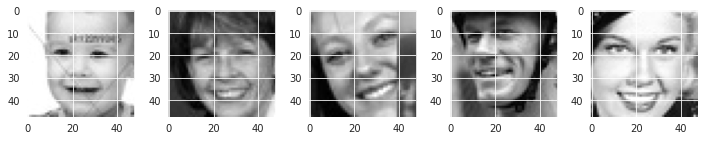

In [ ]:
plot_images(train_dir+"/"+"happy")

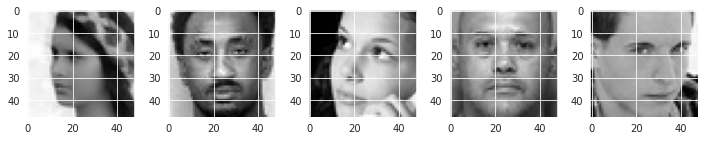

In [ ]:
plot_images(train_dir+"/"+"neutral")

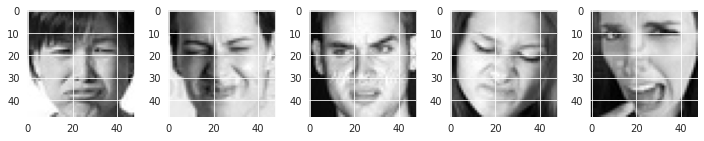

In [ ]:
plot_images(train_dir+"/"+"disgust")

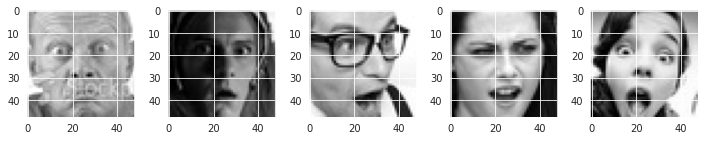

In [ ]:
plot_images(train_dir+"/"+"surprise")


In [ ]:
img_size = 48 #original size of the image

In [ ]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
history = model.fit(x = train_generator,epochs = 50,validation_data = validation_generator)

Epoch 1/50
359/359 [==============================] - 41s 113ms/step - loss: 1.9760 - accuracy: 0.5216 - val_loss: 1.9319 - val_accuracy: 0.5670
Epoch 2/50
359/359 [==============================] - 36s 100ms/step - loss: 1.9655 - accuracy: 0.5263 - val_loss: 2.0433 - val_accuracy: 0.5056
Epoch 3/50
359/359 [==============================] - 38s 107ms/step - loss: 1.9402 - accuracy: 0.5272 - val_loss: 1.8125 - val_accuracy: 0.5573
Epoch 4/50
359/359 [==============================] - 38s 107ms/step - loss: 1.9160 - accuracy: 0.5310 - val_loss: 1.7988 - val_accuracy: 0.5622
Epoch 5/50
359/359 [==============================] - 38s 106ms/step - loss: 1.8768 - accuracy: 0.5351 - val_loss: 2.1303 - val_accuracy: 0.4714
Epoch 6/50
359/359 [==============================] - 38s 105ms/step - loss: 1.8580 - accuracy: 0.5349 - val_loss: 1.8076 - val_accuracy: 0.5887
Epoch 7/50
359/359 [==============================] - 38s 107ms/step - loss: 1.8377 - accuracy: 0.5435 - val_loss: 1.9253 - val_ac

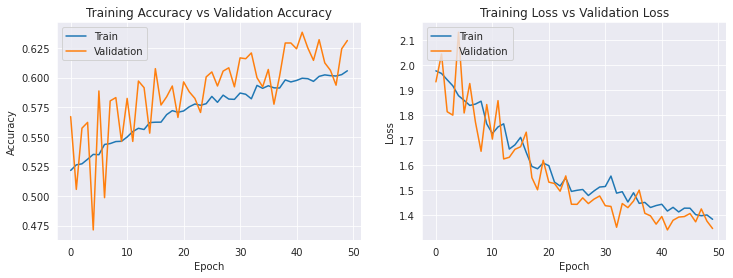

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('./model.h5')